Number of trades simulated: 342


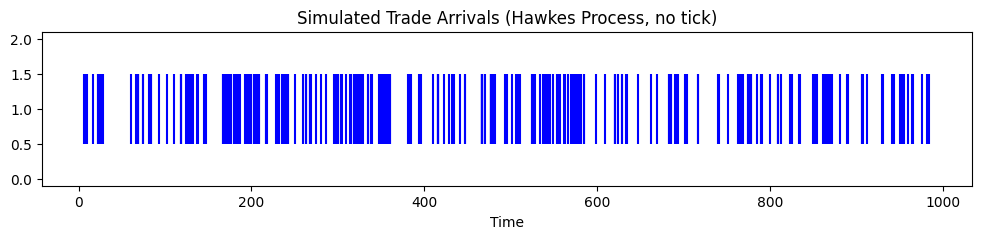

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0.2       # baseline intensity
alpha = 0.5    # excitation factor
beta = 1.0     # decay rate
T = 1000       # simulation horizon

timestamps = []
t = 0
lambda_t = mu

# Ogata's thinning algorithm
while t < T:
    # Upper bound for intensity
    lambda_bar = lambda_t
    # Draw next candidate jump
    u = np.random.rand()
    w = -np.log(u) / lambda_bar
    t = t + w
    if t >= T:
        break
    # Update intensity after decay
    lambda_t = mu + (lambda_t - mu) * np.exp(-beta * w)
    # Accept with probability lambda(t) / lambda_bar
    d = np.random.rand()
    if d <= lambda_t / lambda_bar:
        timestamps.append(t)
        lambda_t += alpha  # jump in intensity

print(f"Number of trades simulated: {len(timestamps)}")

# Plot the event times
plt.figure(figsize=(12,2))
plt.eventplot(timestamps, colors='blue')
plt.title("Simulated Trade Arrivals (Hawkes Process, no tick)")
plt.xlabel("Time")
plt.show()

